In [1]:
import pandas as pd
import numpy as np
from math import e
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('zoo_data(For Decision Tree Program).csv')

In [18]:
df.head()

,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [19]:
target = df["1.7"]
target

0     1
1     4
2     1
3     1
4     1
     ..
95    1
96    6
97    1
98    7
99    2
Name: 1.7, Length: 100, dtype: int64

In [20]:
df = df.drop("1.7",axis=1)
df.head()

,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df,target,test_size=.2)

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [24]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
y_Prediction = classifier.predict(x_test)
y_Prediction

array([7, 6, 1, 1, 2, 2, 2, 1, 4, 1, 7, 6, 1, 4, 1, 1, 1, 2, 6, 3],
      dtype=int64)

In [26]:
print(confusion_matrix(y_test,y_Prediction))

[[8 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 2 1]]


In [27]:
print(accuracy_score(y_test,y_Prediction))

0.85


In [28]:
print(classification_report(y_test,y_Prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       0.33      0.50      0.40         2
           7       0.50      0.33      0.40         3

    accuracy                           0.85        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.86      0.85      0.85        20



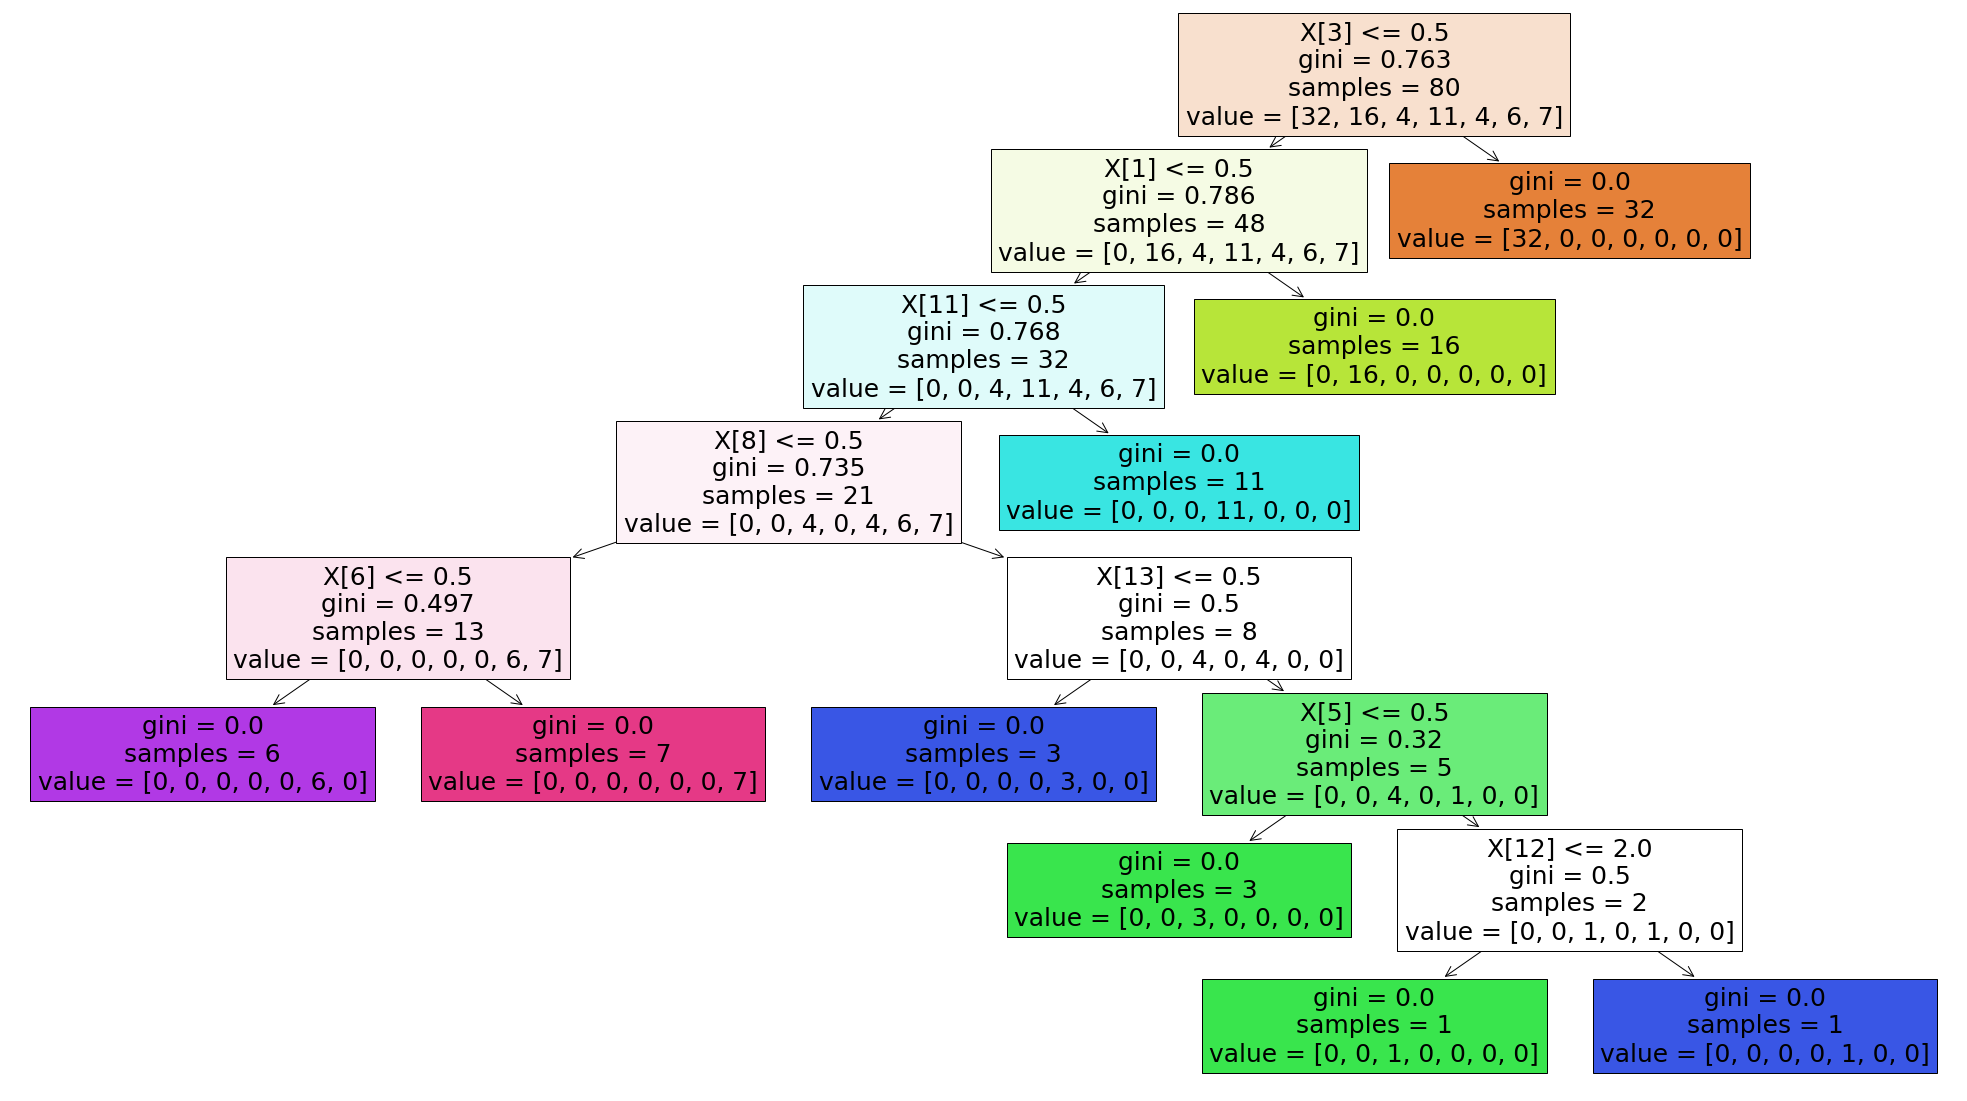

In [30]:
fig = plt.figure(figsize=(35,20))
t  = tree.plot_tree(classifier,filled=True)